In [1]:
import torch

# Path to the latent variables file
#latent_file = "../examples/torus/Run_w_con_loss_one_variable_usual/LatentCodes/2000.pth"
#latent_file = "../examples/torus/Run_w_con_loss_one_variable_usual/LatentCodes/2000.pth"
latent_file = "../examples/torus/LatentCodes/latest.pth"

# Load the latent variables
latent_data = torch.load(latent_file)  # Shape: (num_shapes, latent_size)

In [2]:
# Inspect the keys
print(f"Keys in the loaded file: {latent_data.keys()}")

# Extract latent variables
latent_vectors = latent_data['latent_codes']  # Use the key 'latent_codes'

# Extract latent codes from the OrderedDict
latent_list = list(latent_vectors.values())  # Get the values (list of tensors)

# Combine the list into a single tensor
latent_tensor = torch.stack(latent_list)  # Shape: (num_shapes, latent_size)

print(f"Converted latent variables to tensor with shape: {latent_tensor.shape}")

Keys in the loaded file: dict_keys(['epoch', 'latent_codes'])
Converted latent variables to tensor with shape: torch.Size([1, 369, 16])


In [3]:
epoch = latent_data['epoch']
print(f"Model was saved at epoch: {epoch}")

Model was saved at epoch: 2000


In [4]:
latent_tensor = latent_tensor.squeeze(0)  # Remove the batch dimension
print(f"Latent variables shape after squeezing: {latent_tensor.shape}")

Latent variables shape after squeezing: torch.Size([369, 16])


In [5]:
latent_min = torch.min(latent_tensor, dim=0).values
latent_max = torch.max(latent_tensor, dim=0).values

print("Minimum values for each latent variable:", latent_min)
print("Maximum values for each latent variable:", latent_max)

Minimum values for each latent variable: tensor([-0.5758, -0.8143, -0.3424, -0.4290, -0.3099, -0.3120, -0.3106, -0.3078,
        -0.2471, -0.2912, -0.3580, -0.2847, -0.4196, -0.2566, -0.2800, -0.2971])
Maximum values for each latent variable: tensor([0.5677, 0.7785, 0.3790, 0.3319, 0.3381, 0.3113, 0.3364, 0.3362, 0.2942,
        0.3201, 0.3898, 0.3616, 0.2889, 0.2986, 0.3065, 0.2782])


In [13]:
latent_mean = torch.mean(latent_tensor, dim=0)
latent_std = torch.std(latent_tensor, dim=0)

print("Mean for each latent variable:", latent_mean)
print("Standard deviation for each latent variable:", latent_std)

Mean for each latent variable: tensor([ 0.0232, -0.0011,  0.0019,  0.0130,  0.0023, -0.0030, -0.0062,  0.0088,
         0.0067, -0.0147, -0.0002, -0.0004, -0.0014,  0.0087,  0.0077, -0.0072])
Standard deviation for each latent variable: tensor([0.5199, 0.5449, 0.1586, 0.1608, 0.1582, 0.1532, 0.1478, 0.1546, 0.1559,
        0.1633, 0.1702, 0.1683, 0.1603, 0.1588, 0.1678, 0.1533])


In [7]:
import matplotlib.pyplot as plt

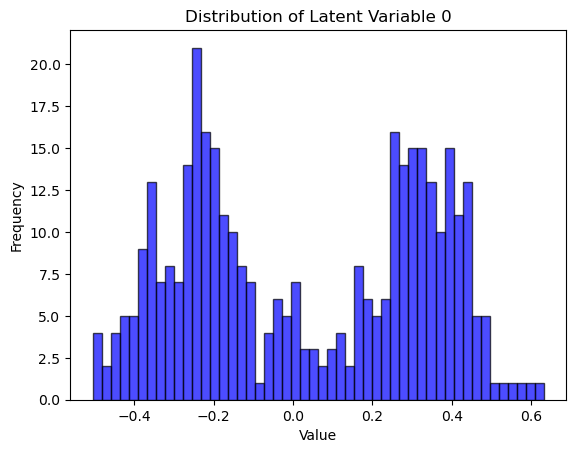

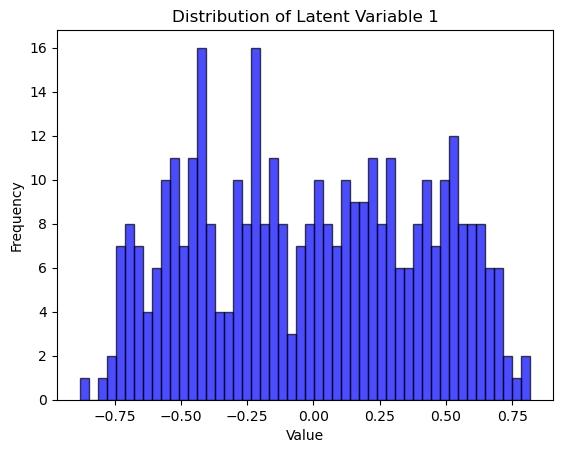

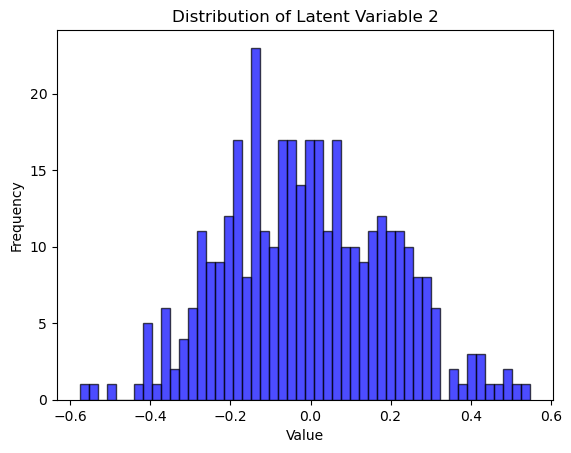

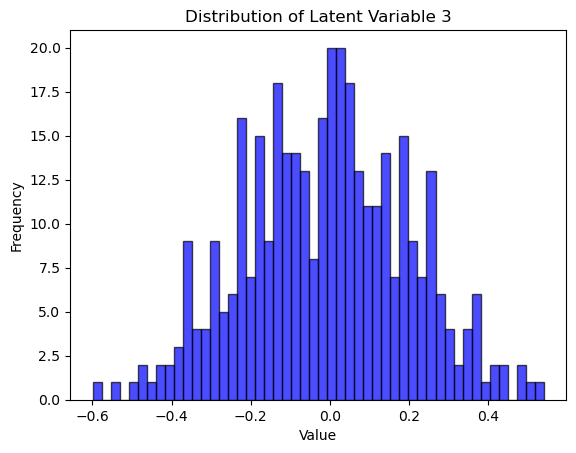

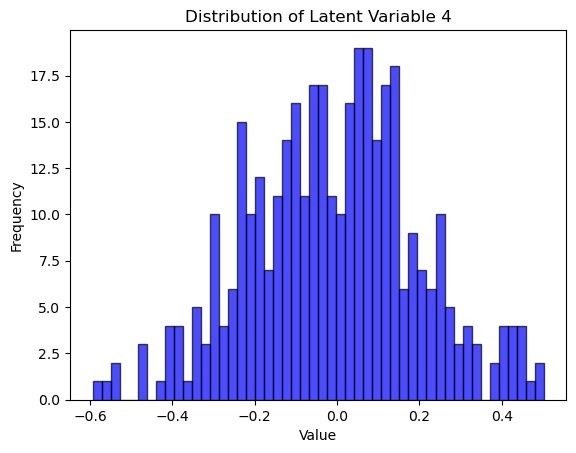

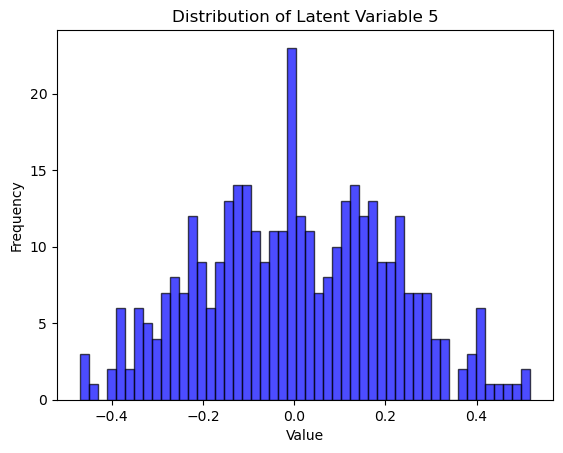

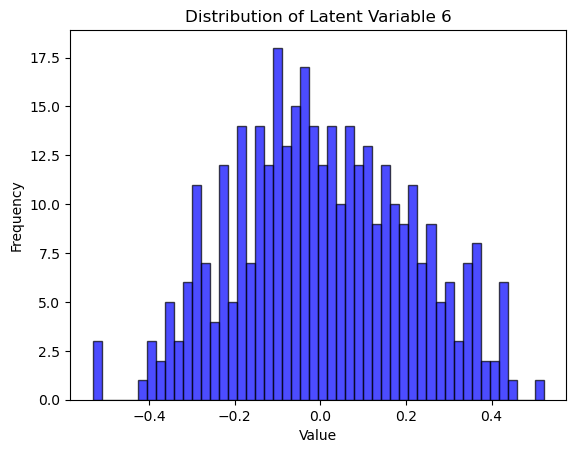

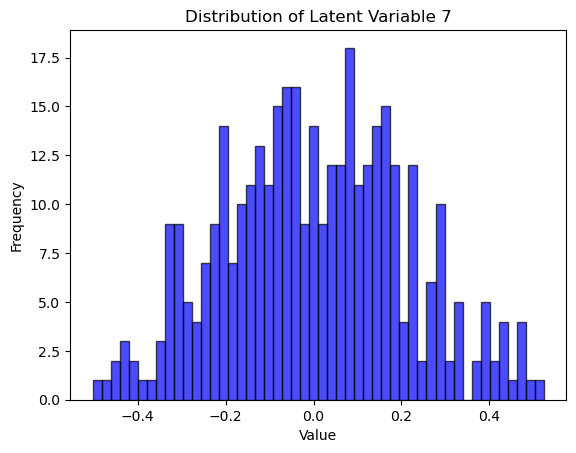

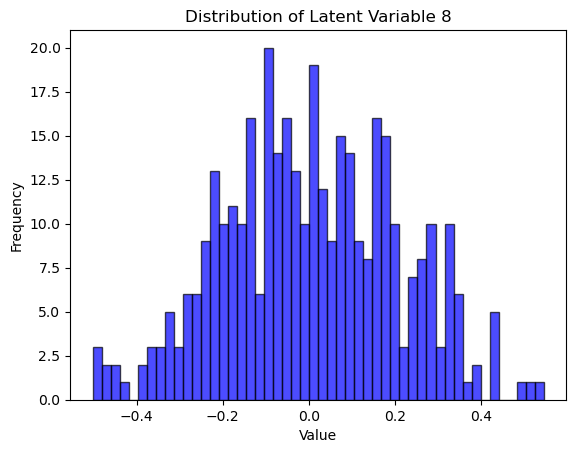

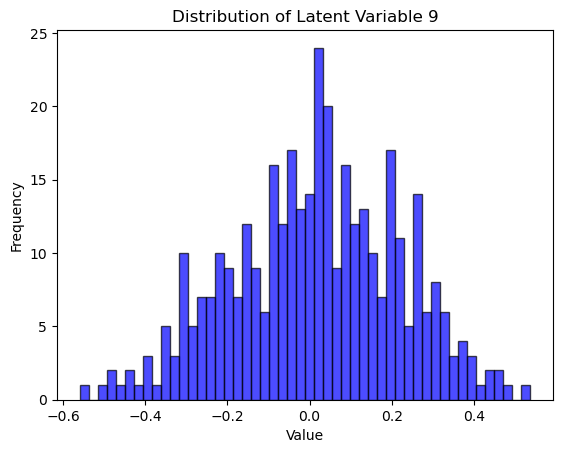

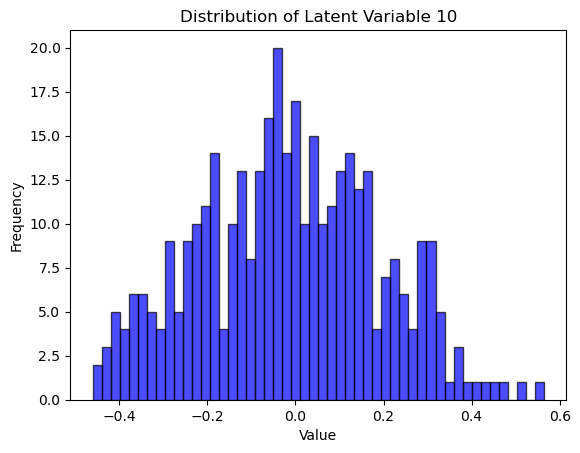

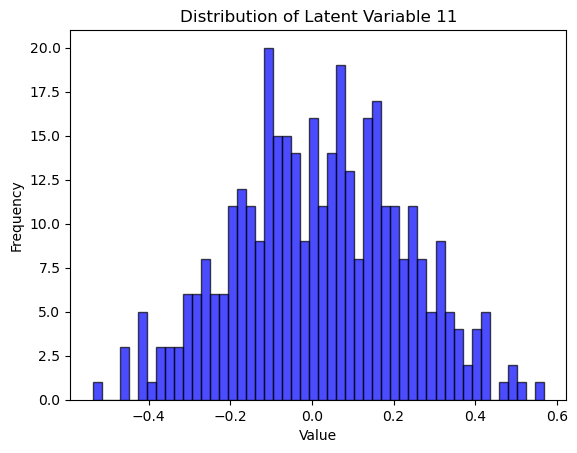

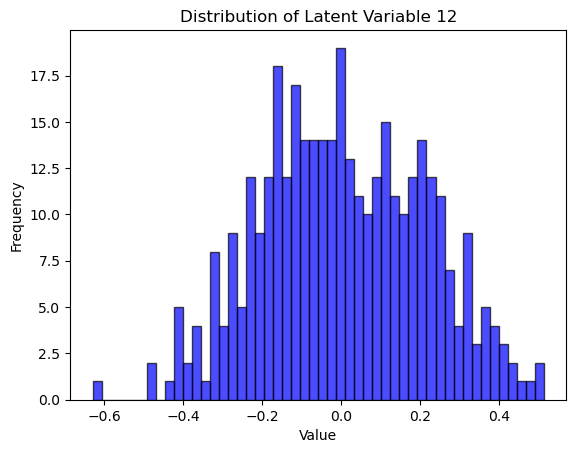

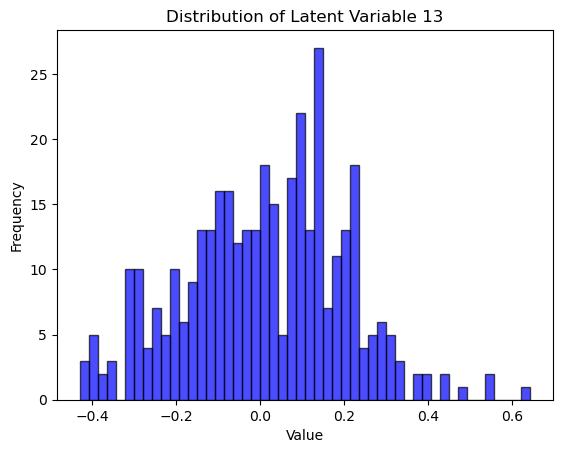

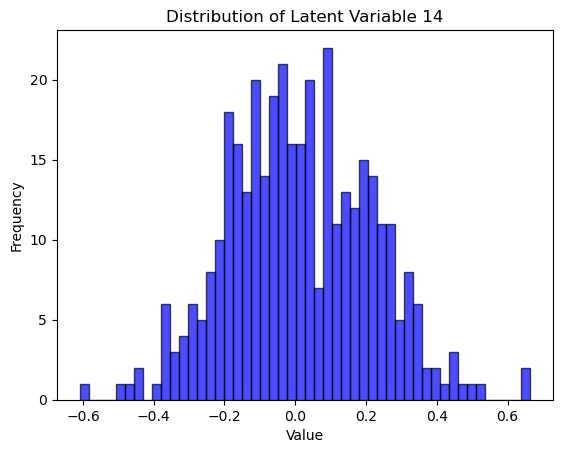

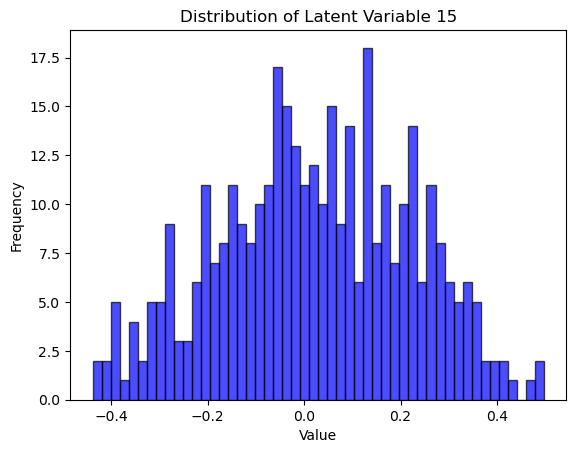

In [8]:
latent_numpy = latent_tensor.cpu().numpy()  # Convert to NumPy for plotting

# Loop over each latent variable and display the plot
for i in range(latent_numpy.shape[1]):
    plt.figure()
    plt.hist(latent_numpy[:, i], bins=50, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"Distribution of Latent Variable {i}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    
    # Show the plot inline in the notebook
    plt.show()

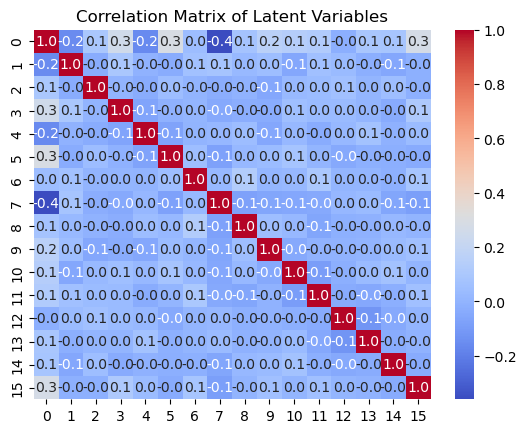

In [9]:
import numpy as np
import seaborn as sns

# Compute the correlation matrix
corr_matrix = np.corrcoef(latent_numpy, rowvar=False)

# Plot the heatmap for visual inspection
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Correlation Matrix of Latent Variables")
plt.show()
